In [16]:
import yfinance as yf
import pandas as pd
from finta import TA
from stockstats import wrap

In [17]:
tic='AAPL'
start = pd.Timestamp('2022-01-01')
end = pd.Timestamp('2022-12-31')
interval='60m'
appl_2022_2023_hourly = yf.download(tic, start, end, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [18]:
appl_2022_2023_hourly.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,180.839996,25170269
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,181.749893,11976542
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,181.600006,8143152
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,182.229706,8407914
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,181.865005,11618629


Rename the columns so that the dataframe can work with TA from finta

In [19]:
appl_2022_2023_hourly.rename(columns={"Open": "open", "Adj Close": "close", "High": "high", "Low": "low", "Volume": "volume"}, inplace=True)
appl_2022_2023_hourly.head()

,open,high,low,Close,close,volume
Datetime,,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,180.839996,25170269
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,181.749893,11976542
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,181.600006,8143152
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,182.229706,8407914
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,181.865005,11618629


Remove close

In [20]:
appl_2022_2023_hourly.drop("Close", inplace=True, axis=1)
appl_2022_2023_hourly.head()

,open,high,low,close,volume
Datetime,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,25170269
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,11976542
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,8143152
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,8407914
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,11618629


In [21]:
TA.SMA(appl_2022_2023_hourly, 10)

Datetime
2022-01-03 09:30:00           NaN
2022-01-03 10:30:00           NaN
2022-01-03 11:30:00           NaN
2022-01-03 12:30:00           NaN
2022-01-03 13:30:00           NaN
                          ...    
2022-12-30 11:30:00    129.385832
2022-12-30 12:30:00    129.279832
2022-12-30 13:30:00    129.116832
2022-12-30 14:30:00    129.008002
2022-12-30 15:30:00    129.051001
Name: 10 period SMA, Length: 1753, dtype: float64

In [22]:
TA.BBANDS(appl_2022_2023_hourly)

,BB_UPPER,BB_MIDDLE,BB_LOWER
Datetime,,,
2022-01-03 09:30:00,NaN,NaN,NaN
2022-01-03 10:30:00,NaN,NaN,NaN
2022-01-03 11:30:00,NaN,NaN,NaN
2022-01-03 12:30:00,NaN,NaN,NaN
2022-01-03 13:30:00,NaN,NaN,NaN
...,...,...,...
2022-12-30 11:30:00,131.554679,128.742421,125.930163
2022-12-30 12:30:00,131.423004,128.662426,125.901848
2022-12-30 13:30:00,131.221419,128.560426,125.899433


In [23]:
TA.RSI(appl_2022_2023_hourly)

Datetime
2022-01-03 09:30:00           NaN
2022-01-03 10:30:00    100.000000
2022-01-03 11:30:00     84.932811
2022-01-03 12:30:00     91.040442
2022-01-03 13:30:00     72.667858
                          ...    
2022-12-30 11:30:00     45.556942
2022-12-30 12:30:00     42.942045
2022-12-30 13:30:00     42.348335
2022-12-30 14:30:00     47.272873
2022-12-30 15:30:00     53.693277
Name: 14 period RSI, Length: 1753, dtype: float64

In [25]:
appl_2022_2023_hourly['date'] = appl_2022_2023_hourly.index
df_with_indicators = wrap(appl_2022_2023_hourly)
df_with_indicators.head()

,open,high,low,close,volume
Datetime,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,25170269
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,11976542
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,8143152
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,8407914
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,11618629


In [26]:
appl_macd = df_with_indicators['macd']
appl_macd

Datetime
2022-01-03 09:30:00    0.000000
2022-01-03 10:30:00    0.020414
2022-01-03 11:30:00    0.021364
2022-01-03 12:30:00    0.044007
2022-01-03 13:30:00    0.040873
                         ...   
2022-12-30 11:30:00   -0.503129
2022-12-30 12:30:00   -0.516636
2022-12-30 13:30:00   -0.530106
2022-12-30 14:30:00   -0.479576
2022-12-30 15:30:00   -0.351559
Name: macd, Length: 1753, dtype: float64

In [30]:
tic='AAPL'
start = pd.Timestamp('2023-02-15')
end = pd.Timestamp('2023-02-20')
interval='1m'
appl_1_march_minutes = yf.download(tic, start, end, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [34]:
appl_1_march_minutes

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-02-15 09:30:00-05:00,153.110001,153.559998,152.880005,153.130005,153.130005,5279953
2023-02-15 09:31:00-05:00,153.119995,153.179993,152.880005,153.059998,153.059998,237738
2023-02-15 09:32:00-05:00,153.052704,153.360001,153.009995,153.175003,153.175003,338473
2023-02-15 09:33:00-05:00,153.190002,153.440002,153.050003,153.380005,153.380005,256284
2023-02-15 09:34:00-05:00,153.369995,153.744904,153.369995,153.625000,153.625000,326771
...,...,...,...,...,...,...
2023-02-17 15:55:00-05:00,152.210007,152.520004,152.210007,152.490005,152.490005,530669
2023-02-17 15:56:00-05:00,152.494995,152.539993,152.399994,152.429993,152.429993,352910
2023-02-17 15:57:00-05:00,152.425003,152.449997,152.330002,152.350006,152.350006,303027


<Axes: xlabel='Datetime'>

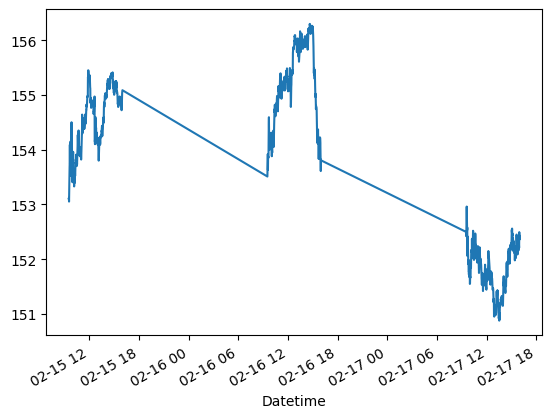

In [33]:
appl_1_march_minutes['Open'].plot()

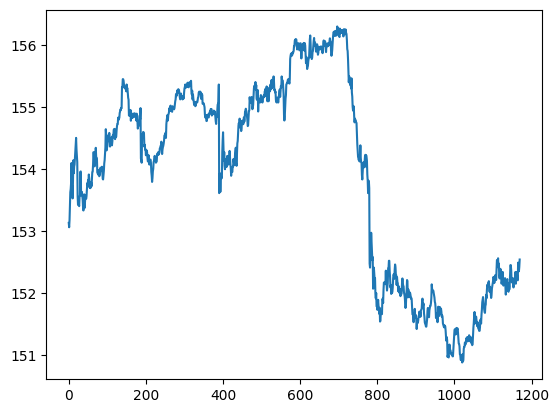

In [36]:
import matplotlib.pyplot as plt
adj_close_minutes = appl_1_march_minutes['Adj Close'].to_list()
plt.plot(adj_close_minutes)

In [38]:
tic='USDJPY=X'
start = pd.Timestamp('2023-02-15')
end = pd.Timestamp('2023-02-16')
interval='1m'
usdjpy_1_march_minutes = yf.download(tic, start, end, interval=interval)

[*********************100%***********************]  1 of 1 completed


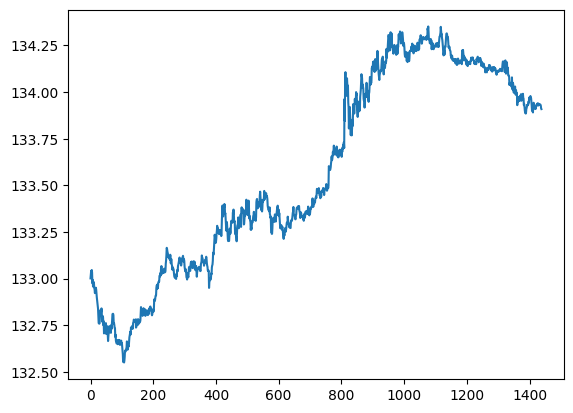

In [39]:
adj_close_minutes = usdjpy_1_march_minutes['Adj Close'].to_list()
plt.plot(adj_close_minutes)